In [1]:
%matplotlib inline

In [4]:
import pymysql as Mdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

In [5]:
sns.set_context('notebook', font_scale=2)
sns.set_style('darkgrid')

In [ ]:
try:
    db = Mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host='seaquel.physics.illinois.edu',
                     db='user_evan_recon_rate_dep',
                     port=3283)

    query = """SELECT eventID, chamber_intensity, D2
               FROM messy_62_3_R005_V001 INNER JOIN merged_roadset62_R005_V001.Occupancy USING(runID, eventID)
               WHERE chamber_intensity > 0"""

    df3 = pd.read_sql(query, db, index_col='eventID')

    if db:
        db.close()

except Mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [7]:
try:
    db = Mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host='seaquel.physics.illinois.edu',
                     db='user_evan_recon_rate_dep',
                     port=3283)

    query = """SELECT eventID, chamber_intensity, H2
               FROM messy_62_3_R005_V001 INNER JOIN merged_roadset62_R005_V001.Occupancy USING(runID, eventID)
               WHERE chamber_intensity > 50000"""

    df3 = pd.read_sql(query, db, index_col='eventID')

    if db:
        db.close()

except Mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [8]:
df3.head()

,chamber_intensity,H2
eventID,,
37850,69498.727608,4
78024,64081.873512,4
77891,67874.625491,4
78975,66179.793557,7
92131,156329.726220,8


In [6]:
try:
    db = Mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host='seaquel.physics.illinois.edu',
                     db='user_evan_recon_rate_dep',
                     port=3283)

    query = """SELECT eventID, chamber_intensity, D2
               FROM messy_62_5_R005_V001 INNER JOIN merged_roadset62_R005_V001.Occupancy USING(runID, eventID)
               WHERE chamber_intensity > 0"""

    df5 = pd.read_sql(query, db, index_col='eventID')

    if db:
        db.close()

except Mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [7]:
try:
    db = Mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host='seaquel.physics.illinois.edu',
                     db='user_evan_recon_rate_dep',
                     port=3283)

    query = """SELECT eventID, chamber_intensity, D2
               FROM messy_62_6_R005_V001 INNER JOIN merged_roadset62_R005_V001.Occupancy USING(runID, eventID)
               WHERE chamber_intensity > 0"""

    df6 = pd.read_sql(query, db, index_col='eventID')

    if db:
        db.close()

except Mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [8]:
try:
    db = Mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host='seaquel.physics.illinois.edu',
                     db='user_evan_recon_rate_dep',
                     port=3283)

    query = """SELECT eventID, chamber_intensity, D2
               FROM messy_62_7_R005_V001 INNER JOIN merged_roadset62_R005_V001.Occupancy USING(runID, eventID)
               WHERE chamber_intensity > 0"""

    df7 = pd.read_sql(query, db, index_col='eventID')

    if db:
        db.close()

except Mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [37]:
df3.to_csv('deut.csv')
df5.to_csv('iron.csv')
df6.to_csv('carb.csv')
df7.to_csv('tung.csv')

In [5]:
df3 = pd.read_csv('deut.csv', index_col='eventID')
df5 = pd.read_csv('iron.csv', index_col='eventID')
df6 = pd.read_csv('carb.csv', index_col='eventID')
df7 = pd.read_csv('tung.csv', index_col='eventID')

In [6]:
intensity = [5000.0*i for i in range(0,13)]
int_bin_centers = np.divide(np.add(intensity[1:],intensity[:-1]),2.0)

In [80]:
group3 = df3.groupby(by=pd.cut(df3.chamber_intensity, intensity)).mean()
group3['N'] = df3.groupby(by=pd.cut(df3.chamber_intensity, intensity)).count()['D2']
group3['mode'] = df3.groupby(by=pd.cut(df3.chamber_intensity, intensity))['D2'].apply(mode).max(level=0)
group3['D2_std'] = df3.groupby(by=pd.cut(df3.chamber_intensity, intensity)).std()['D2']
group3['err_mean'] = group3.D2_std/np.sqrt(group3.N)

group5 = df5.groupby(by=pd.cut(df5.chamber_intensity, intensity)).mean()
group5['N'] = df5.groupby(by=pd.cut(df5.chamber_intensity, intensity)).count()['D2']
group5['mode'] = df5.groupby(by=pd.cut(df5.chamber_intensity, intensity))['D2'].apply(mode).max(level=0)
group5['D2_std'] = df5.groupby(by=pd.cut(df5.chamber_intensity, intensity)).std()['D2']
group5['err_mean'] = group5.D2_std/np.sqrt(group5.N)

group6 = df6.groupby(by=pd.cut(df6.chamber_intensity, intensity)).mean()
group6['N'] = df6.groupby(by=pd.cut(df6.chamber_intensity, intensity)).count()['D2']
group6['mode'] = df6.groupby(by=pd.cut(df6.chamber_intensity, intensity))['D2'].apply(mode).max(level=0)
group6['D2_std'] = df6.groupby(by=pd.cut(df6.chamber_intensity, intensity)).std()['D2']
group6['err_mean'] = group6.D2_std/np.sqrt(group6.N)

group7 = df7.groupby(by=pd.cut(df7.chamber_intensity, intensity)).mean()
group7['N'] = df7.groupby(by=pd.cut(df7.chamber_intensity, intensity)).count()['D2']
group7['mode'] = df7.groupby(by=pd.cut(df7.chamber_intensity, intensity))['D2'].apply(mode).max(level=0)
group7['D2_std'] = df7.groupby(by=pd.cut(df7.chamber_intensity, intensity)).std()['D2']
group7['err_mean'] = group7.D2_std/np.sqrt(group7.N)

In [8]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

In [9]:
df3.head()

,chamber_intensity,D2
eventID,,
32598,33665.852812,240
33118,34937.890670,201
33675,9193.220837,77
34719,13185.662835,56
37850,69498.727608,221


In [82]:
int_bin_centers

array([  2500.,   7500.,  12500.,  17500.,  22500.,  27500.,  32500.,
        37500.,  42500.,  47500.,  52500.,  57500.])

chamber_intensity
(0, 5000]           0
(5000, 10000]       0
(10000, 15000]     57
(15000, 20000]     72
(20000, 25000]     96
(25000, 30000]    117
(30000, 35000]    122
(35000, 40000]    175
(40000, 45000]    190
(45000, 50000]    182
(50000, 55000]    176
(55000, 60000]    218
Name: mode, dtype: int64

In [47]:
colors = sns.color_palette()[:5]

In [109]:
print group7['mode']
print group7['mode'].values[-2]

chamber_intensity
(0, 5000]           0
(5000, 10000]       0
(10000, 15000]     47
(15000, 20000]     82
(20000, 25000]     94
(25000, 30000]    124
(30000, 35000]    129
(35000, 40000]    137
(40000, 45000]    172
(45000, 50000]    184
(50000, 55000]    221
(55000, 60000]    232
Name: mode, dtype: int64
221


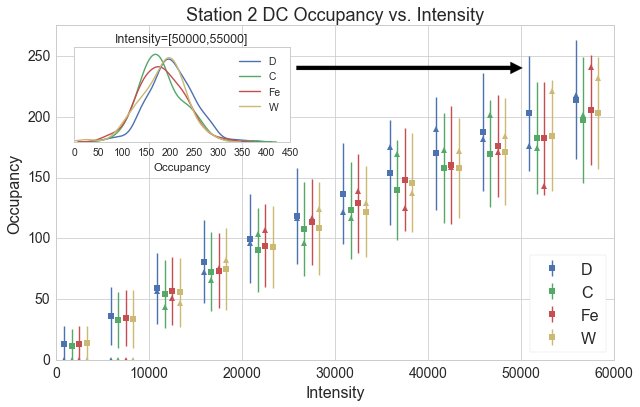

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

ax.errorbar(int_bin_centers-1600, group3.D2,
            yerr=group3.D2_std, label='D', fmt='s', c=colors[0])
#ax.errorbar(int_bin_centers-1600, group3.D2,
#            yerr=group3.err_mean, lw=3, fmt='s', c=colors[0], label='_nolegend_')
ax.plot(int_bin_centers-1600, group3['mode'], '^', c=colors[0], markerfacecolor=None, label='_nolegend_')

ax.errorbar(int_bin_centers-800, group6.D2,
            yerr=group6.D2_std, label='C', fmt='s', c=colors[1])
#ax.errorbar(int_bin_centers-800, group6.D2,
#            yerr=group6.err_mean, lw=3, fmt='s', c=colors[1], label='_nolegend_')
ax.plot(int_bin_centers-800, group6['mode'], '^', c=colors[1], markerfacecolor=None, label='_nolegend_')

ax.errorbar(int_bin_centers, group5.D2,
            yerr=group5.D2_std, label='Fe', fmt='s', c=colors[2])
#ax.errorbar(int_bin_centers, group5.D2,
#            yerr=group5.err_mean, lw=3, fmt='s', c=colors[2], label='_nolegend_')
ax.plot(int_bin_centers, group5['mode'], '^', c=colors[2], markerfacecolor=None, label='_nolegend_')

ax.errorbar(int_bin_centers+800, group7.D2,
            yerr=group7.D2_std, label='W', fmt='s', c=colors[4])
#ax.errorbar(int_bin_centers+800, group7.D2,
#            yerr=group7.err_mean, lw=3, fmt='s', c=colors[4], label='_nolegend_')
ax.plot(int_bin_centers+800, group7['mode'], '^', c=colors[4], markerfacecolor=None, label='_nolegend_')

ax.set_ylim([0,275])
plt.annotate('', xy=(51500, 240), xytext=(24500, 240),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

left, bottom, width, height = [0.15, 0.63, 0.30, 0.22]
ax2 = fig.add_axes([left, bottom, width, height])
sns.distplot(df3.query('50000 < chamber_intensity < 55000').D2,
             hist=False, label='D', ax=ax2, color=colors[0])
sns.distplot(df6.query('50000 < chamber_intensity < 55000').D2,
             hist=False, label='C', ax=ax2, color=colors[1])
sns.distplot(df5.query('50000 < chamber_intensity < 55000').D2,
             hist=False, label='Fe', ax=ax2, color=colors[2])
sns.distplot(df7.query('50000 < chamber_intensity < 55000').D2,
             hist=False, label='W', ax=ax2, color=colors[4])
#plt.plot([group3['mode'].values[-2]], [0.008], '^', color=colors[0])
#plt.plot([group6['mode'].values[-2]], [0.008], '^', color=colors[1])
#plt.plot([group5['mode'].values[-2]], [0.008], '^', color=colors[2])
#plt.plot([group7['mode'].values[-2]], [0.008], '^', color=colors[4])

ax.legend(loc='lower right', frameon=True, fontsize=16)
ax.set_ylabel('Occupancy', fontsize=16)
ax.set_xlabel('Intensity', fontsize=16)
ax.set_title('Station 2 DC Occupancy vs. Intensity', fontsize=18)

for xtick, ytick in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
    xtick.label.set_fontsize(14) 
    ytick.label.set_fontsize(14) 

ax2.set_xlabel('Occupancy')
ax2.get_yaxis().set_visible(False)
ax2.set_xlim([0,450])
ax2.set_title('Intensity=[50000,55000]')
ax2.grid(False)

#ax.tight_layout()

plt.savefig('targ-occupancy.png', dpi=200)

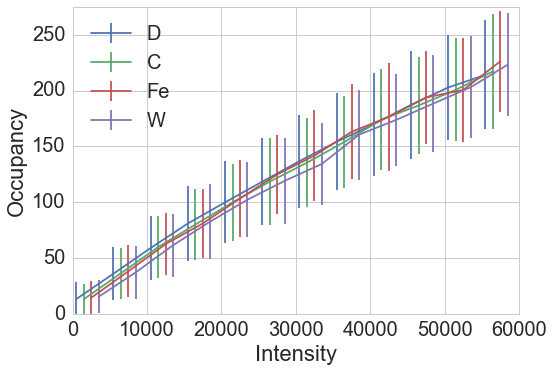

In [45]:
plt.errorbar(int_bin_centers-2000, group3.D2, yerr=group3.D2_std, label='D')
plt.errorbar(int_bin_centers-1000, group6.D2*1.1, yerr=group6.D2_std, label='C')
plt.errorbar(int_bin_centers, group5.D2*1.1, yerr=group5.D2_std, label='Fe')
plt.errorbar(int_bin_centers+1000, group7.D2*1.1, yerr=group7.D2_std, label='W')
plt.ylim([0,275])
plt.legend(loc='best')
plt.ylabel('Occupancy')
plt.xlabel('Intensity')

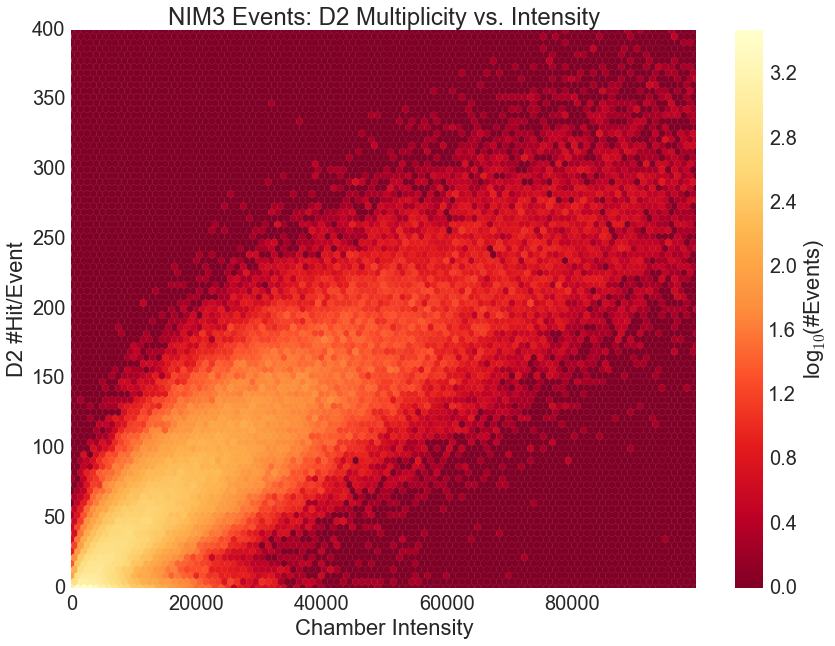

In [39]:
fig, ax = plt.subplots(figsize=(14,10))
slice_df = df.query('chamber_intensity < 100000')
plt.hexbin(slice_df.chamber_intensity,
           slice_df.D2,
           bins='log',
           cmap=plt.cm.YlOrRd_r)
plt.ylabel('D2 #Hit/Event')
plt.xlabel('Chamber Intensity')
plt.ylim([0,400])
cb = plt.colorbar()
cb.set_label(r'log$_{10}$(#Events)')
plt.title('NIM3 Events: D2 Multiplicity vs. Intensity')

In [31]:
cb.colorbar

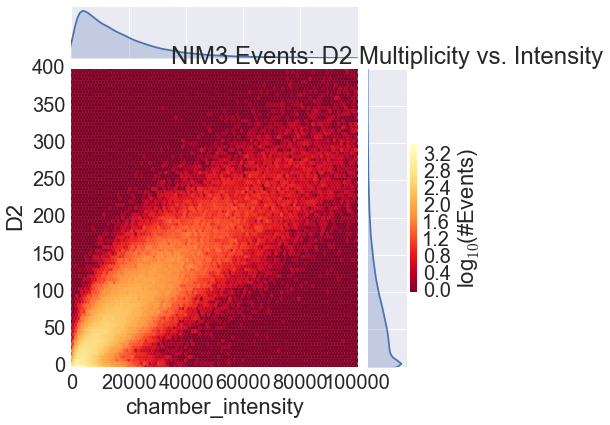

In [57]:
g = sns.JointGrid(slice_df.chamber_intensity, slice_df.D2, space=0.2, xlim=[0,100000], ylim=[0,400])
g = g.plot_joint(plt.hexbin,
                 bins='log',
                 cmap=plt.cm.YlOrRd_r)
g = g.plot_marginals(sns.kdeplot, shade=True)
cb = plt.colorbar()
cb.set_label(r'log$_{10}$(#Events)')
plt.title('NIM3 Events: D2 Multiplicity vs. Intensity')
#plt.ylim([0,400])
#plt.xlim([0,100000])

AttributeError: Unknown property bin

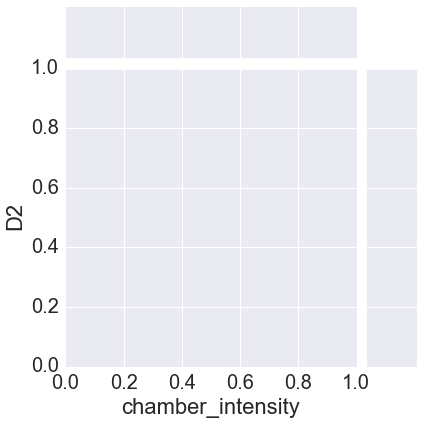

In [45]:
sns.jointplot(slice_df.chamber_intensity, slice_df.D2, kind='hex', joint_kws={'bin' : 'log'})#marginal_kws={'hist_kws': {'log': True}})
plt.ylabel('D2 Occupancy')
plt.xlabel('Intensity')